# Grundlagen

Wir wissen also bereits, dass Messwerte die gesuchten Informationen über eine physikalische Größe beinhalten. Häufig findet die Übertragung dieser Information in Form eines Messsignals statt. Die Frage ist nun: Was ist denn überhaupt ein *Signal*? Dieser Begriff wird umgangssprachlich häufig mehrdeutig benutzt. In unserem Falle, also im technischen Gebrauch, sprechen wir von einem *Zeitverlauf* einer physikalischen Größe. Damit es eindeutig wird, wollen wir statt des Begriffs *Signal* einfach das Wort *Messsignal* einführen. Das bedeutet, dass ein Signal nicht an eine bestimmte physikalische Größe gebunden ist. Ein Signal besteht nämlich in der Regel aus mehreren Parametern (*Informationsparameter*), die die *Träger* von physikalischen Informationen sein können. Das einfachste Beispiel kann ein Messsignal in Form einer sinusförmigen Spannung sein, z.B.:

$$u(t) = \hat u \cdot \sin(\omega t + \varphi)$$

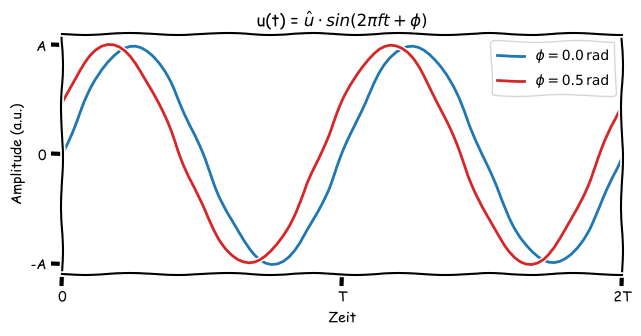

In [5]:
#Benötigte Libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import seaborn as sns
import time
import warnings
warnings.filterwarnings('ignore')

# MatplotLib Settings:
plt.style.use('default') # Matplotlib Style wählen
plt.xkcd()
plt.rcParams['font.size'] = 10; # Schriftgröße

A = 1.0   # Amplitude
f = 10    # Frequenz in Hz
phi = 0.  # Phase in radian
T = 1/f   # Perdiodendauer
t = np.linspace(0,2*T,100) # Zeitwerte der Sinusfunktion in sec

fig = plt.figure(figsize=(7,3))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax.plot(t,A * np.sin(2*np.pi*f*t + phi), 'tab:blue',label = r'$\phi = 0.0\,\mathrm{rad}$')
ax.plot(t,A * np.sin(2*np.pi*f*t + 0.5), 'tab:red', label = r'$\phi = 0.5\,\mathrm{rad}$')
ax.set_xlabel('Zeit')
ax.set_ylabel('Amplitude (a.u.)')
ax.set_xlim(0,2*T)
ax.set_xticks([0, T, 2*T])
ax.set_xticklabels(['0','T','2T'])
ax.set_yticks([-A, 0, A])
ax.set_yticklabels(['-A','0','A'])
#ax.set_title(r'u(t) =%5.1f $\cdot$ sin(%5.1f Hz $\cdot t$ + $\phi$)' %(A, 2*np.pi*f))
ax.set_title(r'u(t) = $\hat u \cdot sin(2 \pi f t + \phi)$')
ax.grid()
ax.legend()
plt.show()

Die Funktion hängt von drei Parametern ab:
* der Amplitude $\hat u$, z.B. in der Einheit Volt oder Ampere
* der Frequenz $f$, bzw. Kreisfrequenz $\omega = 2\pi f$, beides in der Einheit Hz
    * die Frequenz $f = \frac{1}{T}$ ist der Kehrwert der Periodendauer $T$ mit der Einheit s. 
* der Phase (Phasenwinkel) $\phi$, die die Phasenverschiebung oder Verzögerung des Messsignals angibt, typischerweise in radian oder °

Je nach Aufgabe können wir das Messsignal auswerten indem wir entweder die Amplitude messen, oder die Frequenz, oder den Phasenwinkel (oder alle zusammen). 

Vorteil der Nutzung von Messsignalen ist, das physikalische Größen mittels dieser Umwandlung relativ einfach übertragen und weiterverarbeitet werden können. Dies ist insbesondere für Steuer- oder Regelungsprozesse von besonderem Interesse. 

## Wandlung von physikalischen Größen <a id="SubSec-Wandlung_von_physikalischen_Größen"></a>

Schon bei sehr einfachen Messeinrichtungen erfolgt im Allgemeinen eine Wandlung des aus der Umwelt gewonnen Messsignals in einer für den Menschen interpretierbare, bzw. zur Weiterverarbeitung geeignete Signalform. Ganz wichtig ist hierbei, dass die Messinformation auf gar keinen Fall verändert werden darf. Bzw. wenn die Messinformation verändert werden sollte, dann sollte dies immer kontrolliert und bewusst geschehen, sodass die gewünschte Information immer noch zurück gewonnen werden kann. Dies ist in der Praxis aber wieder nur bedingt möglich. 

Wir können auf jeden Fall folgendes zusammenfassen, wenn wir die Wandlung einer physikalischen Größe betrachten:
* Jede physikalische Größe wird in der Regel in ein Signal umgewandelt, da die wenigsten Größen in der Natur *direkt* messbar sind.
* Selbst elektrische Spannungen müssen irgendwie angezeigt werden können:
    * Die Amplitude könnte beispielsweise über einen Zeigerausschlag transformiert werden. Hierfür kann ein *Elektroskop* benutzt werden, welches über die Spannung, bzw. Spannungsdifferenzen, aufgeladen wird. Gleichnamige Ladungen stoßen sich ab und es wird eine elektrostatische Kraft erzeugt: $F = q\cdot E$, wobei $q$ die Ladung und $E$ die Feldstärke ist. D.h. zunächst einmal kann das Elektroskop Ladungen messen. Da es sich aber wir ein Kondensator verhält (zwei voneinander isolierte Elektroden) können wir mittels $Q = CU$ auch Spannungen messen. $C$ ist hierbei die Kapazität des Kondensators (konstant).
    * Für die Temperatur könnte ein temperaturabhängiger Widerstand beutzt werden, der einen Spannungsabfall erzeugt. 

Für die Wandlung einer Signalform in eine andere sollte folgendes gelten:
* Die physikalische Größe der Informationsparamter darf nicht verändert werden, sie wird lediglich in eine neue Signalform umgewandelt.
* Beispiel: Ein Messverstärker, der eine Amplitude eines Messsignals für die Anzeige vorbereitet, wandelt eine *Amplitude* in eine *Amplitude*.

Zur Informationsübertragung werden häufig **elektromagnetische Wellen** oder **elektrische Signale** benutzt. In einigen Bereichen sind aber auch **mechanische**, **pneumatische** und **hydraulische** Signale üblich, vor allem wenn man sich technische Regeleinrichtungen ansieht, spielen die letztgenannten Signale eine wichtige Rolle. Die nachfolgenden Beschreibungen kann aber auch jede Art von Messsignal angewendet werden.

![Bild](pictures/messsignal_wandlung.png)

## Elektromagnetische Wellen als Informationsträger

Radiowellen schwingen bis zu 300 Millionen-mal pro Sekunde (= 300 MHz). Je nach Frequenz, bzw. Wellenlänge, werden Radiowellen in Mittel-, Kurz- und Ultrakurzwellen klassifiziert. Deren Ausbreitungsgeschwindigkeit beträgt Lichtgeschwindigkeit (es sind ja elektromagnetische Wellen) und liegt somit bei 299.792.458 m/s (also ca. 300.000km/s). Die Wellenlänge kann mittels folgender Formel aus Freqnenz $f$ und Geschwindigkeit $c$ berechnet werden:

$$ \lambda = \frac{c}{f}$$

Die Wellenlängen von Radiowellen sind somit über 1m lang.

In [3]:
f = 300e6 # Frequenz in Hz
c = 299792458 # Lichtgeschwindigkeit in m/s
wellenlaenge = c/f
print('Die Wellenlänge einer Schwingung mit Frequenz f = %5.2f MHz beträgt %5.2f m' %(f/1e6,wellenlaenge))

Die Wellenlänge einer Schwingung mit Frequenz f = 300.00 MHz beträgt  1.00 m


Da die Wellenlänge sehr groß ist, wird diese Art von Strahlung kaum durch Teilchen in unserer Atmosphäre oder Ionosphäre absorbiert und abgeschwächt, sondern tatsächlich reflektiert. Dadurch eignet sie sich hervorragend für die Signalübertragung von langen Distanzen. Die Ionosphäre agiert quasi als riesengroßer Spiegel für die Radiowelle, wodruch die Strahlung zurück zur Erde reflektiert wird. (Tatächlich wird dank Strahlung aus dem Weltall dafür gesrogt, dass Elektronen aus Atomen in der Ionosphäre gelöst werden. Dadruch bilden sich positiv geladene Atomreste, welche zusammen mit den freien Elektronen einen Spiegel für Radiowellen bilden.)

* Radiowellen mit Frequenzen **unter 30 MHz** können von der Ionosphäre vollständig reflektiert werden. Einige Telekommunikations- und Radarsysteme nutzen die reflektierenden Eigenschaften der Ionosphäre für Radiowellen unterhalb von etwa 30 MHz zur Überbrückung großer Entfernungen.
* Radiowellen mit Frequenzen **oberhalb von 30 MHz** können die Ionosphäre durchdringen, so dass eine Kommunikation mit Satelliten möglich wird.  (Die Radiowellen regen die freien Elektronen zum Schwingen an, wodurch ein Dipolstrahler entsteht. Dieser erzeugt Strahlung mit einer Phasenverschiebung, aber der gleichen Frequenz. Als Resultat sieht es so aus, als würde die einfallende Strahlung von Erde vom Lot webgebrochen werden (Die Ionosphäre ist also ein optisch dünneres Medium. Je steiler der Einfallswinkel (oder je höher die Frequenz), umso tiefer dringt die Radiowelle in die ionisierte Schicht ein. 
* Selbst im **GHz-Bereich** macht sich ein Brechungseinfluss noch störend bemerkbar, wodurch Messfehler bei der Satellitennavigation entstehen.

Die Reichweite von Signale zur Übertragung von Informationen hängt also von der Wellenlänge bzw. Frequenz der Strahlung ab und den Umgebungsparametern (wie z.B. die Ionosphäre). Weitere  elektromagnetische Wellen, welche gerne zur Signaleübertragung benutzt werden, sind z.B.:
* Funkwellen (~1m - ~1km)
* Mikrowellen (~1mm - ~1m)
* Infrarot-Strahlung (~1um - ~1mm)
* UV-Strahlung (~100nm - ~390nm)
* Röntgenstrahlung (~30pm - ~1nm)

Das sichtbare Licht, ebenfalls eine elektromagnetische Welle, ist nur in einem verhältnismäßig kleinem Bereich zu finden.~

Es gilt allgemein, je kleiner die Wellenlänge, desto höher die Frequenz, desto höher ist die Energie, die transportiert wird:

$$E = h \cdot f $$

mit $h = 6.626\cdot 10^{-34}\,\mathrm{Js}$ dem Planck'schen Wirkungsquantum.

![Bild](pictures/EM_spectrum.png)

```{admonition} Ausbreitung von Funkwellen in der Ionosphäre
:class: dropdown


Radiowellen unterschiedlicher Frequenz und Einfallswinkel werden an der Ionosphäre reflektiert und auf die Erde zurück geworden, oder durchgelassen, wodruch Satellitenkommunikation ermöglich wird. Ob und wie Funkwellen reflektiert werden, hängt von der Dichte und Höhe der Ionosphärenschicht ab, und von der Frequenz der einfallenden Funkwelle. 

Durch Sonneneinstrahlung im ultravioletten Bereich werden Elektronen in der Ionosphäre von ihren Luftatomen getrennt. Dadurch entstehen freie Elektronen und postiv geladene Ionenrümpfe bleiben zurück. Je stärker die Sonneneinstrahlung (je mehr UV-Lichtteilchen), desto mehr Elektronen frei gesetzt und die Elektronendichte, $N_e$, steigt an. 

* 0-90km: hier gibt es keine freien Elektronen, keine Ionosphäre!
* 50-90km: D_Schicht: keine Bedeutung für unsere Funkwellen (sie existiert auch nur am Tag wenn die Sonneneinstrahlung am stärksten ist
* ~100km: E-Schicht
* ~200km: F1-Schicht
* 250-400km: F2-Schicht: größte Elektronen-/Ionendichte mit etwa $N_e =$ 1 Million/cm$^3$ freie Elektronen
* noch höher: Luftmoleküle werden seltener, wodruch die Elektronendichte trotz stärkerer Strahlung wieder abnimmt 

Ionosphäre ist tagüber, bei maximaler Sonneneinstrahlung, am stärksten mit freien Elektronen versetzt. Nachts nimmt die  Ionosphäre ab, da sich die freien Elektronen wieder mit den Ionen verbinden. Dies dauert je nach Höhe der Schicht unterschiedlich lang. Die F2-Schicht beispielsweise ist auch nachts noch so stark ausgeprägt, dass sie zur Übertragung von Funkwellen benutzt werden kann. 

Wenn Funkwellen in die Ionosphäre eintreten, ändern sie ihre Richtung, ähnlich wie Lichtstrahlen an einem Prisma. Niederigere Frequenzen brechen sich hierbei leichter, also hohe Frequenzen. Schräge Wellen berechen sich leichter als senkrecht eintreffende Strahlen. 

Das Verhalten von Funkwellen beim Auftreffen auf freie Elektronen kann mittels Plasmatheorie beschrieben werden. In einem Plasma treten lokal verdichtete Bereiche von freien Elektronen auf. Das sogenannten Elektronengas. An diesen Stellen ist die Dichte der Elektronen so hoch, dass die Coulombkraft abstoßend zwischen den Elektronen in Vorschein tritt. Dadurch werden die Elektronen wieder auseinander getrieben. Aufgrund der Trägheit der Elektronen treten hierdurch allerdings an anderen Stellen wieder lokale Verdichtungen auf und der Effekt wiederholt sich. Dieses Hin und Her von lokalen Ladungsüberschussen resultiert in eine periodische Schwingung, die sogenannte Plasmafrequenz, mit der die Elektronendichte um ihre mittlere Dichte oszilliert:

$$f_p = \frac{1}{2\pi}\sqrt{\frac{N_e e^2}{\epsilon_e m_e}} \approx 8,978\,\mathrm{Hz} \cdot \sqrt{\frac{N_e}{\mathrm{m^3}}}$$

Hier ist $\epsilon_0 = 8,854\cdot 10^{-12}\,\mathrm{\frac{As}{Vm}}$ die elektrische Feldkonstante, $N_e$ die Elektronendichte, $m_e$ die Elektronenmasse, $e = 1,602\cdot 10^{-19}\,\mathrm{C}$ die Elementarladung. Abhängig von der Höhe haben wir in der Ionosphäre unterschiedliche Elektronendichten und können folgende Plasmafrequenzen berechnen:
* 100km Höhe: $f_p = 1,5\,\mathrm{MHz}$
* 800km Höhe: $f_p = 7\,\mathrm{MHz}$

Der Brechungsindex $n$ der Ionosphäre lässt sich mittels folgender Formel berechnen: 

$$n = \sqrt{1- \frac{f_p^2}{f^2}}$$

Hierbei wurde die Zyklotronfrequenz der Elektronen, die durch das Magnetfeld der Erde  hervorgerufen wird, vernachlässigt. Unter Berücksichtung der Kreisbewegung der Elektronen um die Feldlinien im Erdmagnetfeld würde ansonsten ein zusätzlicher Frequenzterm von etwa 1,3MHz zu der Gleichung hinzugefügt werden und je nach Polrisation der einfallenden Funkwelle (links-zirkular oder recht-zirkular) würden sich leicht unterschiedliche Brechungsindizies ergeben, abhängig davon, ob die Drehrichtung mit der Elektronenbewegung übereinstimmt.

Anhang dieser Formel sind zwei Fälle zu berücksichtigen:

* $f < f_p$: der Brechungsindex wird imaginär. D.h. es findet vollständige Reflektion statt und Lang- und Mittelwellen kommen wieder zurück zur Erden
* $f > f_p$: der Brechungsindex ist real. D.h. die Funkwellen können die Schicht durchdringen (bei senkrechtem Einfall der Strahlung)

Das bedeutet für unsere beiden Fälle von oben, dass unter senkrechtem Einfall:
* in 100km Höhe Funkwellen mit einer Frequenz von <1,5MHz vollständig reflektiert werden. Wellen höherer Frequenz können diese Ionosphärenschicht durchdringen.
* in 800km Höhe Funkwellen mit einer Frequenz von <7,0MHz vollständig reflektiert werden. Wellen höherer Frequenz können diese Ionosphärenschicht durchdringen. 
* Funkwellen mit Frequenzen >7MHz werden die Erde nicht wieder erreichen.

Die Plasmafrequenz ist in dieser Annäherung also die kritische Frequenz, bis zu welcher Funkwellen unter einem senkrechtem Einfallswinkel, vollständig reflektiert werden. 

Desweiteren wird beobachtet, dass die Durchlässigkeit der Ionosphäre für Funkwellen vom Eintreffwinkel abhängt und näherungsweise über folgende Formel beschrieben werden kann:

$$f_\mathrm{MUF} \approx \frac{f_\mathrm{krit}}{\sin(\alpha)} = f_\mathrm{krit} \cdot \sqrt{1 + \left(\frac{d}{2 h_\mathrm{krit}}\right)^2}$$

wobei $\alpha$ der Winkel ist, der die Strahlung zum Horizont bildet, $f_\mathrm{krit}$ die kritische Frequenz ist, unter welcher die Strahlung vollständig reflektiert werden würde, $d$ ist die Entfernung zwischen Sender und Empfänger und $h_\mathrm{krit}$ die virtuelle Höhe der Reflektion. Hier ist $f_\mathrm{MUF}$ die **Grenzfrequenz** der Funkwelle, welche gerade noch von der Schicht reflektiert wird. MUF steht hierbei für *maximum usable frequency*. Analog gibt es auch die LUF-Frequenz, die *lowest usable frequency*. 

```